In [13]:
from IPython.display import display
import numpy as np
import pandas as pd

波士顿房价数据集字段说明
CRIM 房屋所在镇的犯罪率
ZN   面积大于25000平方英尺住宅所占的比例
INDUS 房屋所在镇非零售区域所占比例
CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0
NOX 一氧化碳的浓度
RM 平均房间数量
AGE 1940年前建成房屋所占的比例
DIS 房屋距离波士顿五大就业中心的加权距离
RAD 距离房屋最近的公路
TAS 财产税额度
PTRATIO 房屋所在镇师生比例
B 计算公式：1000(房屋所在镇非美籍人口所在比例-0.63)*2
LSTAT 弱势群体人口所占比例
MEDV 房屋的平均价格

In [14]:
data = pd.read_csv(r'data/boston.csv')
# data
# 查看数据的基础数据
# data.info()
# 查看是否具有重复值
# data.duplicated().any()

In [15]:
class LinearRegression:
    """使用python实现的线性回归。（最小二乘法）"""

    def fit(self, X, y):
        """根据提供的训练数据X，对模型进行训练。

        Parameters
        - - - - - -
        X:类数组类型。形状：[样本数量，特征数量]
          特征矩阵，用来对模型进行训练。

        y:类数组类型，形状：[样本数量]

        """
        # 说明：如果X是数组对象的一部分，而不是完整的对象数据（例如，X是由其他对象通过切片传递过失）
        # 则无法完成矩阵的转换
        # 这里创建X的拷贝对象，避免转换矩阵的时候失败
        X = np.asmatrix(X.copy())
        # y是一维结构（行向量或者列向量），一维结构可以不用进行拷贝
        # 注意：现在要进行矩阵计算，需要二维的结构，通过reshape方法进行转换
        y = np.asmatrix(y).reshape(-1, 1)
        # 通过最小二乘法公式，求解出最佳权重值
        self.w_ = (X.T * X).I * X.T * y

    def predict(self, X):
        """根据参数传递的样本X，对样本数据进行预测
         Parameters
         - - - - - -
        X:类数组类型。形状：[样本数量，特征数量]
          待预测的样本特征（属性）

        Returns
        - - - - - -
        result:数组类型
            预测结果。
        """
        # 将X转换成矩阵，注意：需要对X进行拷贝
        X = np.asmatrix(X.copy())
        result = X * self.w_
        # 将矩阵转换成ndarray数组
        # 使用ravel可以将数组进行扁平处理
        return np.array(result).ravel()


In [16]:
# 不考虑截距的情况
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
result

array([32.42172415, 31.8657517 ,  9.52136202, 12.48229778, 24.0752596 ,
       35.61159169, 21.87963658, 21.83586334, 16.13822255, 28.48423313,
       41.28647977, 26.0070672 , 40.90725627, 24.65197618, 22.2287279 ,
       11.88538102, 14.5199733 , 13.16619548, 21.0977285 ,  1.63668138,
       26.26626362, 25.86673712, 40.16246266, 19.1258097 , 24.32830298,
       35.13353136, 32.25968441,  8.93124625, 25.58561747, 43.81949568,
       19.53189418, 20.55379055, 24.5683383 , 18.66213437,  6.19091265,
       20.40754604, 37.07542018, 17.15206598, 22.57021671, 14.31645882,
       22.99055777, 21.07104457, 20.68038122, 21.46684886, 33.637416  ,
       22.37838619, 29.64746524, 34.74371484, 42.05521487, 17.38195016,
       16.53374748, 36.47846766, 19.90996409, 10.58283639, 16.4811832 ,
       23.49337741, 21.52104979, 19.00410109, 26.06647172, 11.47742661,
        7.6341651 , 21.89711762,  8.08465405, 25.81009681,  3.40571466,
       27.08371318, 32.58359789, 23.38377005, 19.39222026, 18.11

In [18]:
display(np.mean((result - test_y) ** 2))

17.011905533632483

In [20]:
# 查看模型的权重
print(lr.w_)

[[-9.32859692e-02]
 [ 4.39664692e-02]
 [ 5.72354432e-03]
 [ 2.41509608e+00]
 [-3.31988921e+00]
 [ 5.59119871e+00]
 [-2.18905524e-03]
 [-8.57221736e-01]
 [ 2.28120616e-01]
 [-1.18896061e-02]
 [-2.52710238e-01]
 [ 1.49077626e-02]
 [-4.56116634e-01]]


In [22]:
# 考虑截距，增加一列，改列的所有值都是1
t = data.sample(len(data),random_state=0)
# t['Intercept'] = 1
# 按照习惯，截距作为w0，为之配上一个x0，x0列放在最前面
new_columns = t.columns.insert(0, 'Intercept')
# 重新安排列的顺序，如果值为空，则使用fill_value参数指定的值进行填充
t = t.reindex(columns=new_columns, fill_value=1)
t

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAS,PTRATIO,B,LSTAT,MEDV
329,1,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,22.6
371,1,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
219,1,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50,23.0
403,1,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,8.3
78,1,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34,21.2
15,1,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
487,1,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666.0,20.2,388.22,11.45,20.6
340,1,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29,18.7
310,1,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64,16.1
102,1,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6


In [23]:
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
result

array([35.34289976, 32.56027605,  8.41605682, 10.76441775, 22.40510667,
       34.57839997, 18.85010693, 19.04819727, 15.31591499, 26.19380603,
       39.70116608, 25.57272795, 41.19683392, 25.14857116, 22.62271262,
       10.65210461, 12.54433824, 14.95320115, 18.93790499,  3.65468619,
       27.5931246 , 26.43144254, 39.52724121, 20.63112118, 21.66926471,
       34.30662795, 33.10570745, 10.15893122, 25.38756046, 41.81840499,
       17.23104577, 18.50719176, 25.64386143, 18.75253276,  6.55388358,
       20.43057918, 34.56291524, 16.59186994, 23.30059919, 14.45158113,
       24.49108561, 19.61531561, 17.77832727, 18.36301736, 33.49931946,
       19.90505698, 31.63525954, 34.18624669, 39.77711706, 17.58135063,
       17.41802409, 35.90901185, 18.64999369,  8.8650229 , 14.89716369,
       25.18444225, 20.47407629, 17.10572723, 27.58036666, 13.43611287,
        6.27714191, 19.78525035,  7.26815566, 27.08571494,  2.26807905,
       29.44352678, 32.02833063, 22.93015152, 17.47756054, 18.75

In [24]:
display(np.mean((result - test_y) ** 2))

17.09753138466811

In [25]:
# 查看模型的权重
print(lr.w_)

[[ 4.00542166e+01]
 [-1.10490198e-01]
 [ 4.11074548e-02]
 [ 1.14986147e-02]
 [ 2.03209693e+00]
 [-1.95402764e+01]
 [ 3.28900304e+00]
 [ 6.91671720e-03]
 [-1.39738261e+00]
 [ 3.78327573e-01]
 [-1.54938397e-02]
 [-8.64470498e-01]
 [ 8.29999966e-03]
 [-5.66991979e-01]]


In [26]:
# KNN可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
# 默认情况下，matplotlib不支持中文显示。需要设置
# 设置字体为黑体，以支持中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置在中文字体时，能够正常的显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

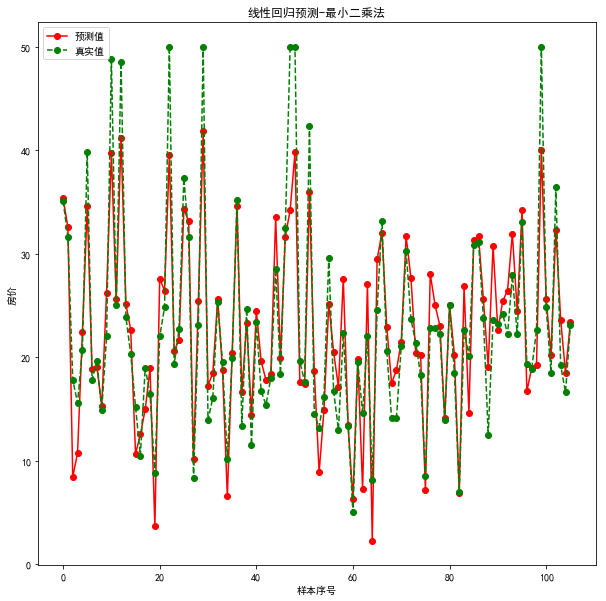

In [27]:
# 设置画布大小
plt.figure(figsize=(10,10))
# 绘制预测值
plt.plot(result,"ro-",label="预测值")
# 绘制真实值
plt.plot(test_y.values,"go--",label="真实值")

plt.title('线性回归预测-最小二乘法')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend(loc='best')
plt.show()